Computing the histogram distance

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import collections
from sklearn import datasets
digits = datasets.load_digits()

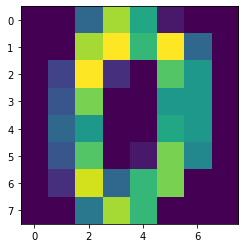

In [4]:
image0 = digits.images[0]
image1 = digits.images[1]
plt.imshow(image0)

In [51]:
def occurence(img, pixel):
    count = collections.Counter(img)
            
    return count[pixel]

In [29]:
def hist_distance(img1, img2):
  img1 = img1.flatten()
  img2 = img2.flatten()
  xList = [0]*256
  yList = [0]*256

  distance = 0
  for i in range(len(img1)):
    xList[int(img1[i])] += 1
    yList[int(img2[i])] += 1
  
  for k in range(len(xList)):
    distance += abs(xList[k] - yList[k])

  return distance

In [33]:
print(hist_distance(image0, image1))

40


In [38]:
# Hist between digits dataset images
def digits_hist(imgSource):
  allHists = []
  for i in range (10):
    imgToCompare = digits.images[i]
    allHists.append(hist_distance(imgSource, imgToCompare))

  return allHists

allHists = digits_hist(image0)
allHists

[0, 40, 26, 20, 28, 38, 32, 24, 28, 28]

Image search

In [48]:
# Displaying images and their hist
def search_images(imgSource):
  num_col = 5
  num_row = 2
  num = 10
  allHists = digits_hist(imgSource)
  fig, axes = plt.subplots(num_row, num_col, figsize = (1.5*num_col, 2*num_row))

  for i in range(num) :
    ax = axes[i//num_col, i%num_col]
    ax.imshow(digits.images[i], cmap='gray')
    if(allHists[i] == 0):
      ax.set_title('Source Image')
    else:
      ax.set_title('Hist: {}'.format(allHists[i]))
  plt.tight_layout()
  plt.show()


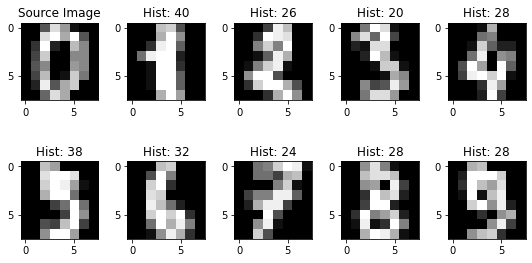

In [49]:
search_images(image0)